<a href="https://colab.research.google.com/github/trinhtuanvubk/Traffic-Signs-Recognition/blob/main/traffic_signs_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os 
os.environ['KAGGLE_USERNAME'] = 'tunvtrnh'
os.environ['KAGGLE_KEY'] = "ef2946d57c2ac5f9a68b417a0e570f5f"

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 600M/612M [00:03<00:00, 240MB/s]
100% 612M/612M [00:03<00:00, 207MB/s]


In [ ]:
mkdir train_traffic


In [ ]:
!unzip gtsrb-german-traffic-sign.zip -d train_traffic

Streaming output truncated to the last 5000 lines.
  inflating: train_traffic/train/5/00005_00053_00010.png  
  inflating: train_traffic/train/5/00005_00053_00011.png  
  inflating: train_traffic/train/5/00005_00053_00012.png  
  inflating: train_traffic/train/5/00005_00053_00013.png  
  inflating: train_traffic/train/5/00005_00053_00014.png  
  inflating: train_traffic/train/5/00005_00053_00015.png  
  inflating: train_traffic/train/5/00005_00053_00016.png  
  inflating: train_traffic/train/5/00005_00053_00017.png  
  inflating: train_traffic/train/5/00005_00053_00018.png  
  inflating: train_traffic/train/5/00005_00053_00019.png  
  inflating: train_traffic/train/5/00005_00053_00020.png  
  inflating: train_traffic/train/5/00005_00053_00021.png  
  inflating: train_traffic/train/5/00005_00053_00022.png  
  inflating: train_traffic/train/5/00005_00053_00023.png  
  inflating: train_traffic/train/5/00005_00053_00024.png  
  inflating: train_traffic/train/5/00005_00053_00025.png  
  inf

In [ ]:
! mv train_traffic /content/drive/MyDrive/ 

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path ="/content/drive/MyDrive/train_traffic/"



#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print("data.shape : ",data.shape)
print("labels.shape : ",labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


data.shape :  (39209, 30, 30, 3)
labels.shape :  (39209,)
X_train.shape :  (31367, 30, 30, 3)
X_test.shape :  (7842, 30, 30, 3)
y_train.shape :  (31367,)
y_test.shape :  (7842,)


In [37]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)         

In [38]:

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("model_CNN.h5")

Epoch 1/15
981/981 [==============================] - 6s 5ms/step - loss: 2.9486 - accuracy: 0.3532 - val_loss: 0.3433 - val_accuracy: 0.9169
Epoch 2/15
981/981 [==============================] - 4s 5ms/step - loss: 0.6259 - accuracy: 0.8201 - val_loss: 0.1510 - val_accuracy: 0.9631
Epoch 3/15
981/981 [==============================] - 4s 5ms/step - loss: 0.3785 - accuracy: 0.8946 - val_loss: 0.0925 - val_accuracy: 0.9742
Epoch 4/15
981/981 [==============================] - 4s 5ms/step - loss: 0.2904 - accuracy: 0.9179 - val_loss: 0.0753 - val_accuracy: 0.9806
Epoch 5/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2691 - accuracy: 0.9235 - val_loss: 0.1533 - val_accuracy: 0.9566
Epoch 6/15
981/981 [==============================] - 4s 4ms/step - loss: 0.2982 - accuracy: 0.9189 - val_loss: 0.0591 - val_accuracy: 0.9838
Epoch 7/15
981/981 [==============================] - 4s 5ms/step - loss: 0.2217 - accuracy: 0.9390 - val_loss: 0.0705 - val_accuracy: 0.9844
Epoch 

<function matplotlib.pyplot.show>

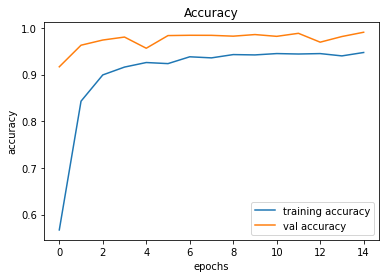

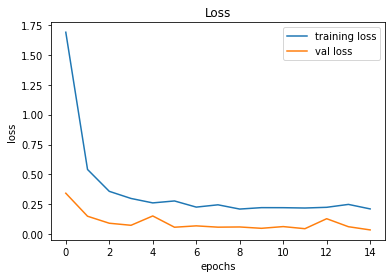

In [39]:
#plotting graphs for accuracy 
# fig , (plt,plt) = plt.subplots(1,2)
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show

In [41]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
test_csv_path = "/content/drive/MyDrive/train_traffic/Test.csv"
y_test = pd.read_csv(test_csv_path)
path = "/content/drive/MyDrive/train_traffic/"
labels = y_test["ClassId"].values
imgs = path + y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print("acc : ",accuracy_score(labels, pred))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


acc :  0.9596991290577989
